<a href="https://colab.research.google.com/github/sammyculotta/PHY122-Lab/blob/main/phy_122_errorprop2t_SC_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Stuff

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy.random import normal as random_normal
from numpy import arange, sort, searchsorted, exp, sqrt
from numpy import sum as Σ

π = np.pi

def Normal(x, μ, σ):
    ## a.k.a. Gaussian-function given: domain x and two parameters μ, σ
    return exp( - (x-μ)**2/(2*σ**2) ) / sqrt(2*π*σ**2)

def get_histogram(x, data, normalize=False):
    ### binary-search of sorted data for-all domains.
    ### let: N = len(data), then: O ~ (N + len(x))log(N)
    out = searchsorted( sort(data), x, side="right")
    if normalize:
        return x[1:] + (x[:-1] - x[1:])/2, (out[1:] - out[:-1])/len(data)
    return x[1:] + (x[:-1] - x[1:])/2, out[1:] - out[:-1]

def ExpectationValue(X):
    return np.sum(X)/len(X)

def RMSD(f1, f2):
    """
    Root-Mean-Square-Deviation
    compare two functions
    """
    return sqrt( (  Σ( (f1 - f2)**2 )  ) / (len(f1)) )

# Gaussian-Functions

Plot 3 Gaussian-functions using the above defintion

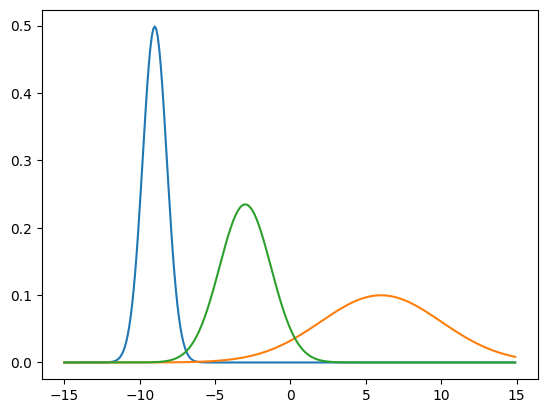

In [ ]:
dx = 0.1
x  = arange(-15,15,dx)

plt.plot( x , Normal(x,-9.0, 0.8) )
plt.plot( x , Normal(x, 6.0, 4.0) )
plt.plot( x , Normal(x,-3.0, 1.7) )
plt.show()

In the above chart we see 3 normal distribution curves with different standard deviations and means.

# Random Variables

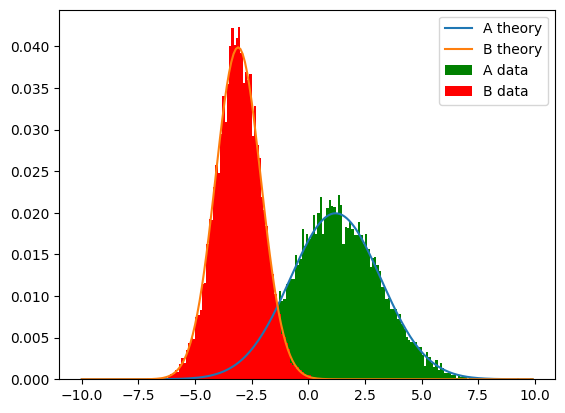

In [ ]:
## Gaussian-function parameters
μ1 =  1.2
σ1 =  2.0
μ2 = -3.1
σ2 =  1.0

## domain
dx = 0.1
x  = arange(-10,10,dx)

## define random variables
n = 10000 ## number of samples collected
A = random_normal(μ1, σ1, n) ## random variable A
B = random_normal(μ2, σ2, n) ## random variable B

## make histograms of the random variables
y, hA = get_histogram(x, A, normalize=True)
y, hB = get_histogram(x, B, normalize=True)

## plot histograms with overlied continuous representation
plt.bar(  y , hA, label="A data", color="g", width=0.10)
plt.bar(  y , hB, label="B data", color="r", width=0.10)
plt.plot( x , Normal(x, μ1, σ1) * dx, label="A theory")
plt.plot( x , Normal(x, μ2, σ2) * dx, label="B theory")
plt.legend()
plt.show()

In the above chart we see 2 distributions assigned random variables which follow the gaussian theory curves closely. We can use gaussian theory to extract patterns in random data.

# $f = aA$

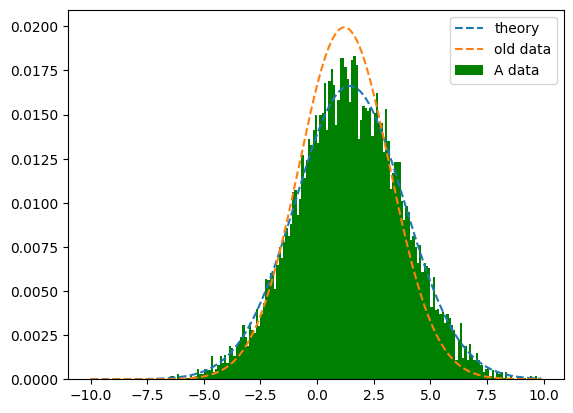

np.float64(0.0006724636315514289)

In [ ]:
a = 1.2 ## constant

bins, hA = get_histogram(x, a*A, normalize=True)
σ     = sqrt(a**2 * σ1**2)
μ     = a * μ1

plt.bar(bins, hA, label="A data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ)   * dx, linestyle="dashed", label="theory")
plt.plot(x, Normal(x, μ1, σ1) * dx, linestyle="dashed", label="old data")
plt.legend()
plt.show()

RMSD(Normal(bins, μ, σ)*dx, hA)

The above graph shows the effects of multiplying all the data by a constant (1.2). Notice that the mean does not necessarily scale vertically by the same factor. Rather, data points more than one standard deviation from the mean begin to extend beyond the range of the original Gaussian curve. This effect becomes more apparent when multiplying by a factor of 2 or 3. The mean is also scaled by the same factor.

# $f = A + B$

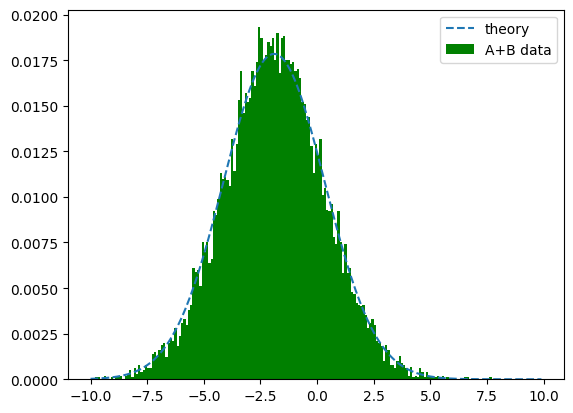

np.float64(0.000585516788511727)

In [ ]:
bins, hAB = get_histogram(x, A+B, normalize=True)

σ = sqrt(σ1**2 + σ2**2)
μ = μ1 + μ2

plt.bar( bins , hAB, label="A+B data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ) * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

RMSD(Normal(bins, μ, σ)*dx, hAB)

The above graph shows the effects of adding the data from A to B.

# $f = aA + bB$

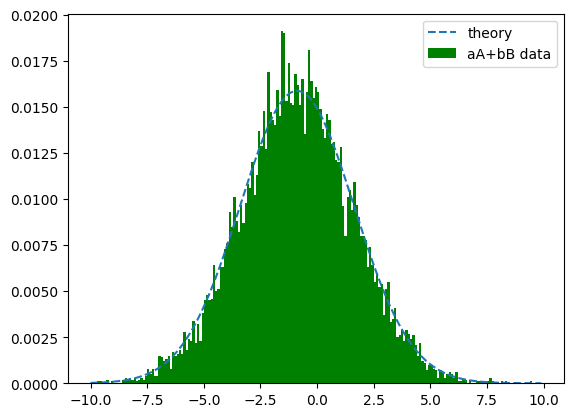

np.float64(0.0007593221390497359)

In [ ]:
## constants considered
a = 1.20
b = 0.75

bins, hAB = get_histogram(x, a*A+b*B, normalize=True)
μ = a*μ1 + b*μ2
σ = sqrt( a**2 * σ1**2 + b**2 * σ2**2 )   ## error propagation here

## plot
plt.bar( bins , hAB, label="aA+bB data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ) * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

RMSD(Normal(bins, μ, σ)*dx, hAB)

The above graphs show the effects of multiplying dataset "A" by some random constant, multiplying dataset "B" by some random constant, and then adding the two results together. The mean and standard deviation are also scaled by the same constants.


# $f = AB$

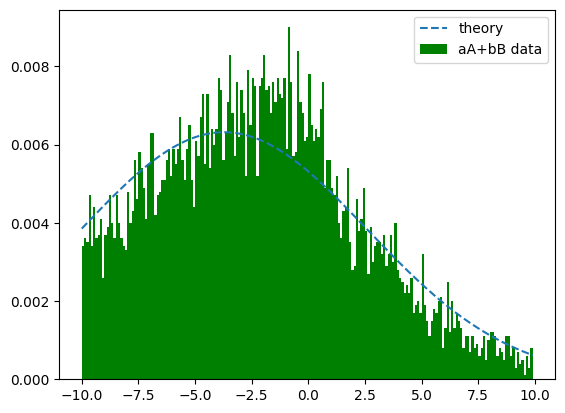

np.float64(0.000912933550508201)

In [ ]:
bins, hAB = get_histogram(x, A*B, normalize=True)
μ = μ1 * μ2
σ = sqrt( μ**2 * ((σ1/μ1)**2 + (σ2/μ2)**2) )   ## error propagation here

plt.bar( bins , hAB, label="aA+bB data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ) * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

RMSD(Normal(bins, μ, σ)*dx, hAB)

The above graph shows the effects of multiplying the datasets together. When multiplying datasets, we cannot simply multiply each standard deviation together but have to a different formula.

# DiY

### go to the table: https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulae and implement one of the **non-linear** entries. Just like the previous 'experiments'. Note that you will be computing the relative error.

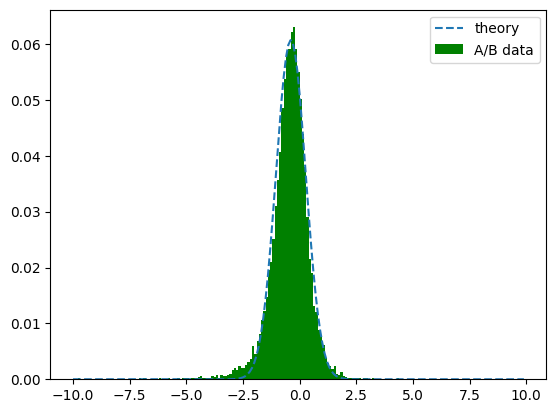

np.float64(0.0013395675740353935)

In [ ]:
bins, hAB = get_histogram(x, A/B, normalize=True)
μ = (μ1 / μ2)
σ = sqrt( μ**2 * ((σ1/μ1)**2 + (σ2/μ2)**2) )   ## error propagation here

plt.bar( bins , hAB, label="A/B data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ) * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

RMSD(Normal(bins, μ, σ)*dx, hAB)

The above graph shows the effects of dividing dataset "A" by dataset "B".

# Questions \& Conclusion

## Give a summary of what you did in this lab.

In this lab we explore gaussian functions and how experimental random data can be correlated to such theories. Gaussian functions are manipulated through the standard deviation and the mean. The larger the standard deviation the wider the graph will appear, and the smaller the standard deviation the more scrunched the data will appear. We use random data to make histograms. From these histograms we can manipulate the data through different methods such as multiplying by a constant, adding, subtracting, multiplying, and dividing. We must keep in mind that when we use such functions to manipulate data, the mean and standard deviation calculations are not always so straightforward.  We see how gaussian theory may or may not be related to experimental data to test hypotheses.